## Summarise results

This notebook is a work in progress, attempting to quickly make summary plots of the results from Steps 1-4. 


In [1]:
%load_ext autoreload


In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image, display
import cmasher as cmr
import subprocess as sproc
from shlex import split as shplit
import glob
from all_prof_functions import plot_eig_gp

%aimport -os -np -plt -cmr
%autoreload 2


In [3]:
# Set up some plotting stuff
plt.rc('savefig', bbox='tight')
#plt.rcParams['text.usetex'] = False
use_bk_bgd = False #### Change this to switch between dark and light backgrounds for plots (True == dark) #####
if use_bk_bgd:
    plot_style = 'dark_background'
    # The CMasher package provides lots of lovely colour maps; chroma is a handy sequential cmap
    cmap = cmr.chroma_r
    c1 = cmap(0.0)
    c2 = cmap(0.1)
    c3 = cmap(0.33)
    c4 = cmap(0.55)
    c5 = cmap(0.68)
    c6 = cmap(0.815)
    k_alpha = 0.4

else:
    plot_style = 'default'
    cmap = cmr.chroma
    c1 = cmap(0.0)
    c2 = cmap(0.3)
    c3 = cmap(0.53)
    c4 = cmap(0.65)
    c5 = cmap(0.78)
    c6 = cmap(0.915)
    k_alpha = 0.4


The following cell initialises some key variables, defining the dataset you're working on and where the data are located. Change the parameters noted below. 


In [4]:
data_dir = '/home/s86932rs/research/nudot_stuff/' # change this to the absolute/relative path to your data and .npz files
plots_dir = os.path.join(data_dir, 'plots') # change this if necessary


In [5]:
# look in data_dir to make a list of pulsars, frequencies, and backends
psr_list = []
freq_list = []
be_list = []
blob = sorted(glob.glob(os.path.join(data_dir, '*corrs.txt'))) # final correlation output
for filename in blob:
    filen = filename.split('/')[-1]
    psr, be, freq, _ = filen.split('_')
        
    freq = int(freq.split('.')[0])
    psr_list.append(psr)
    freq_list.append(freq)
    be_list.append(be)
    
psr_list = np.array(psr_list)
freq_list = np.array(freq_list)
be_list = np.array(be_list)


Correlations found for B0144+59_afb_1400


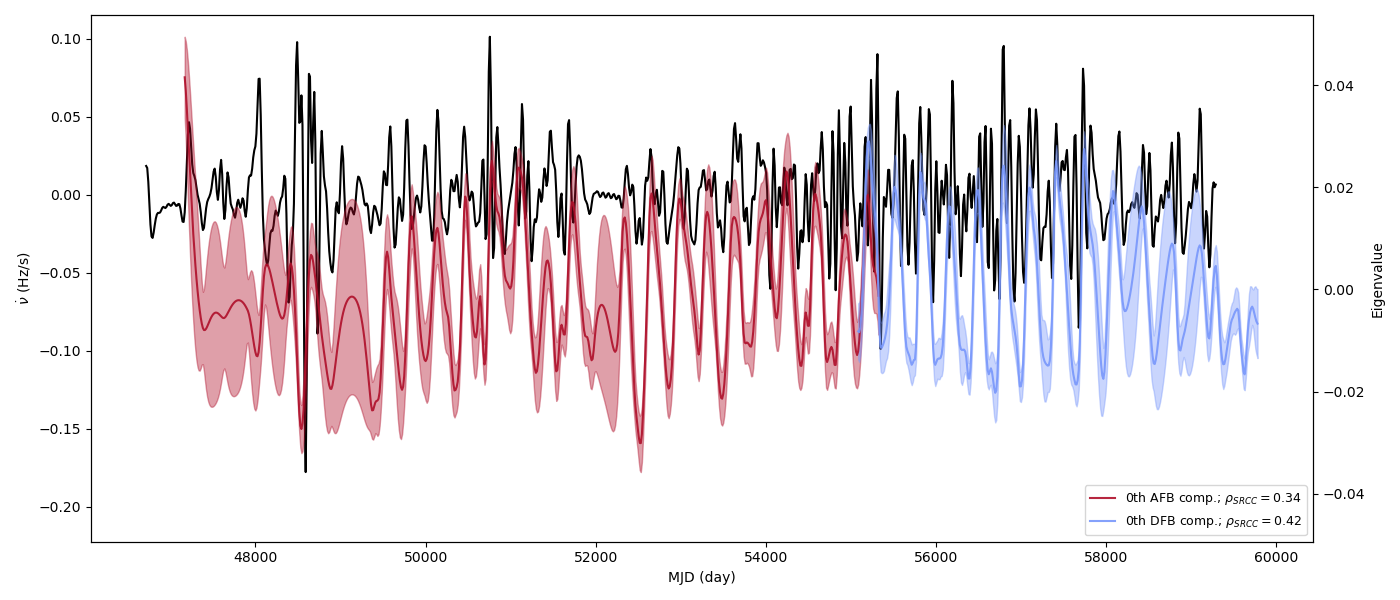

Correlations found for B0144+59_dfb_1400
Correlations found for B0740-28_dfb_1400


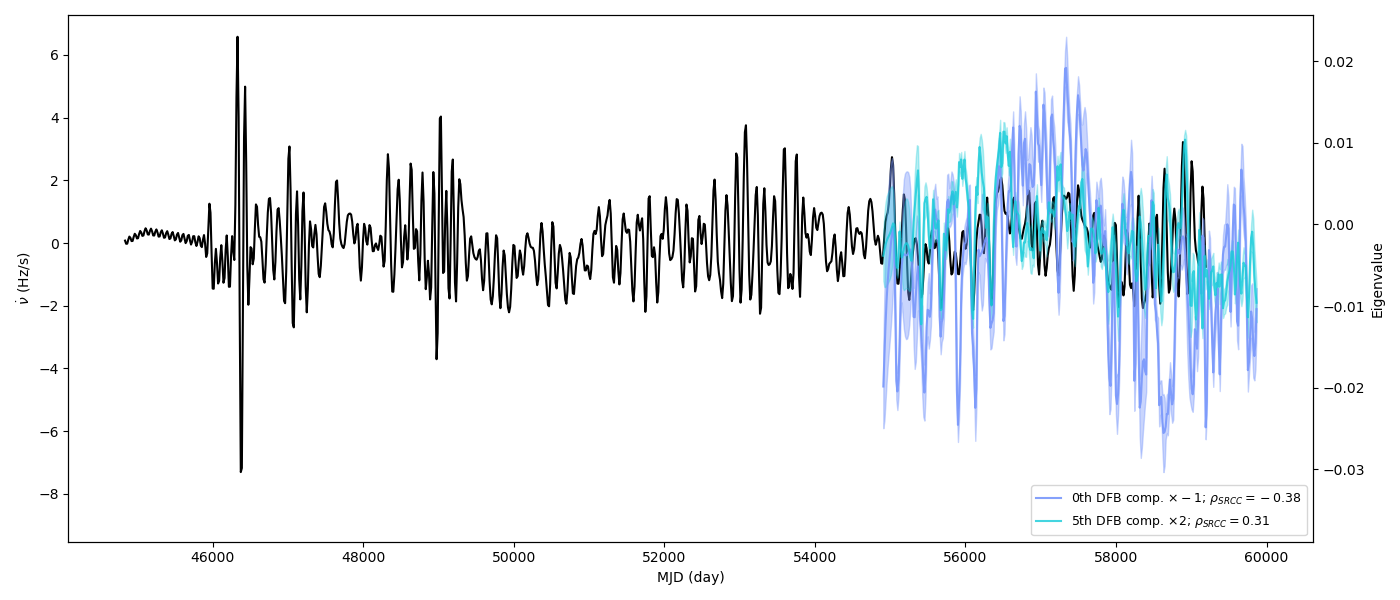

Correlations found for B0919+06_dfb_1400


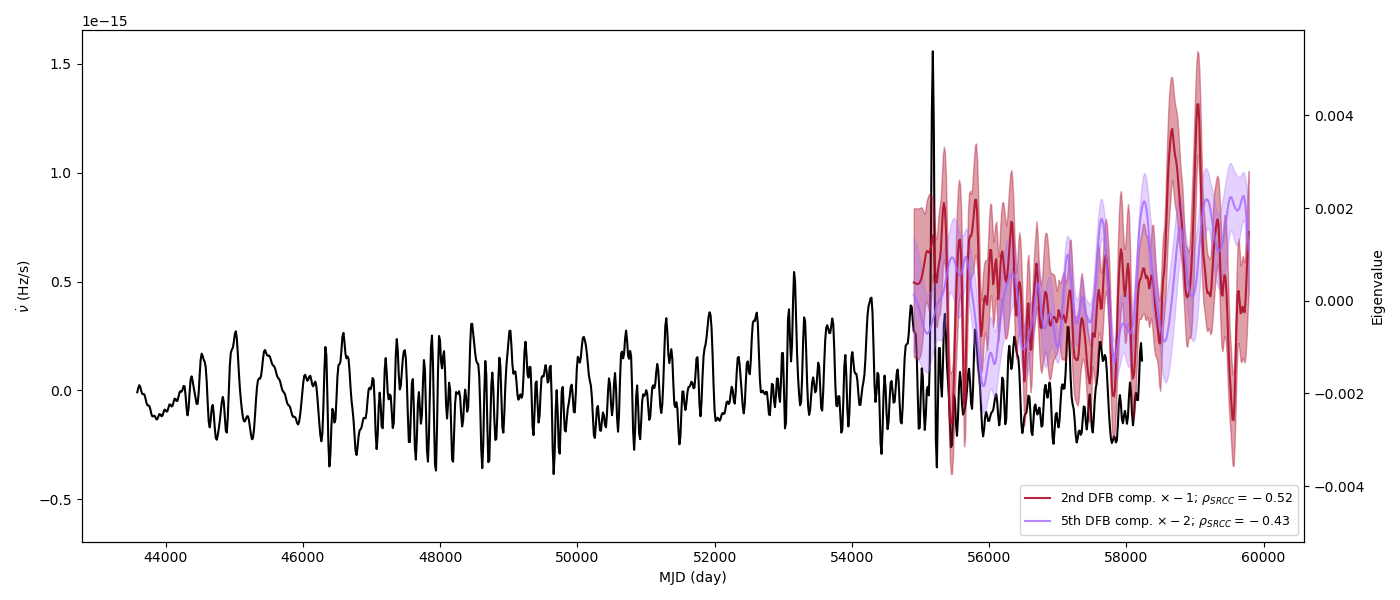

Correlations found for B1540-06_afb_1400


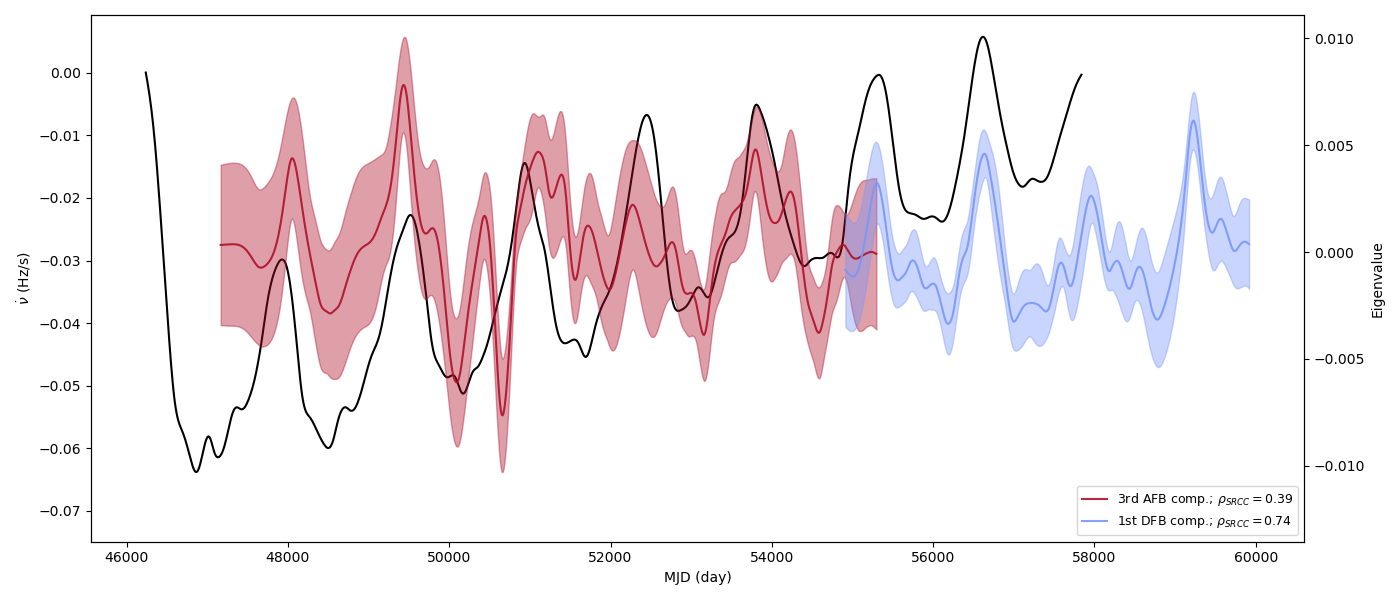

Correlations found for B1540-06_dfb_1400
Correlations found for B1642-03_afb_1400


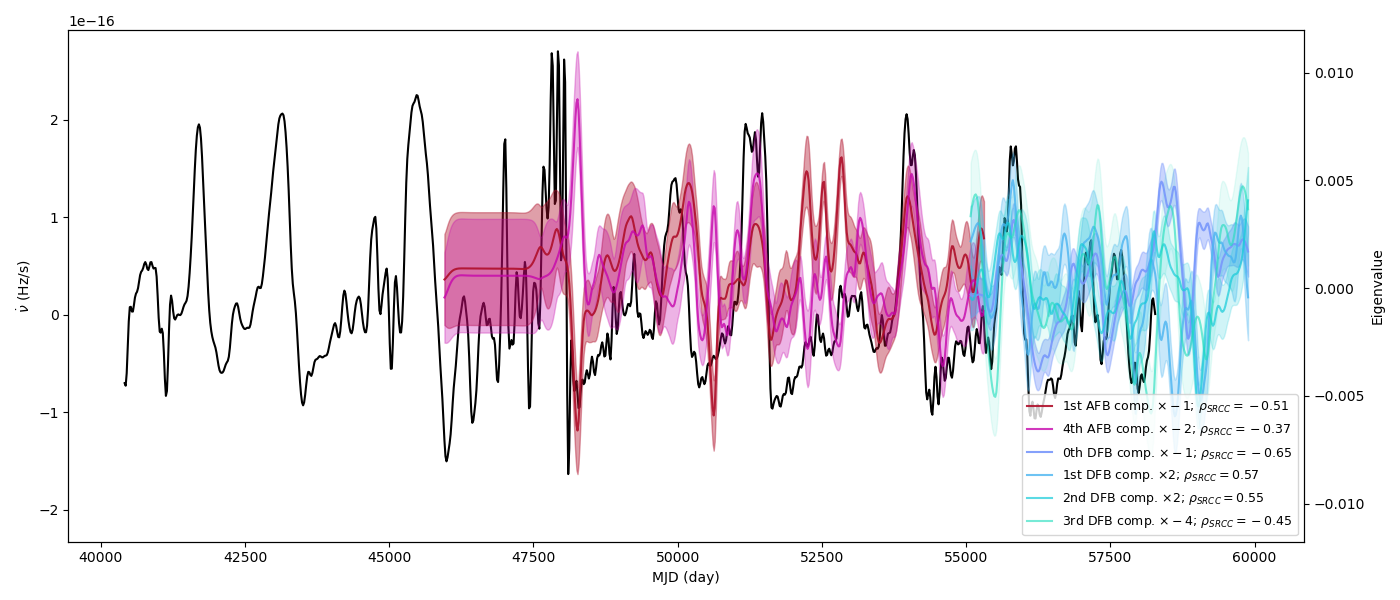

Correlations found for B1642-03_dfb_1400
Correlations found for B1727-33_afb_1400


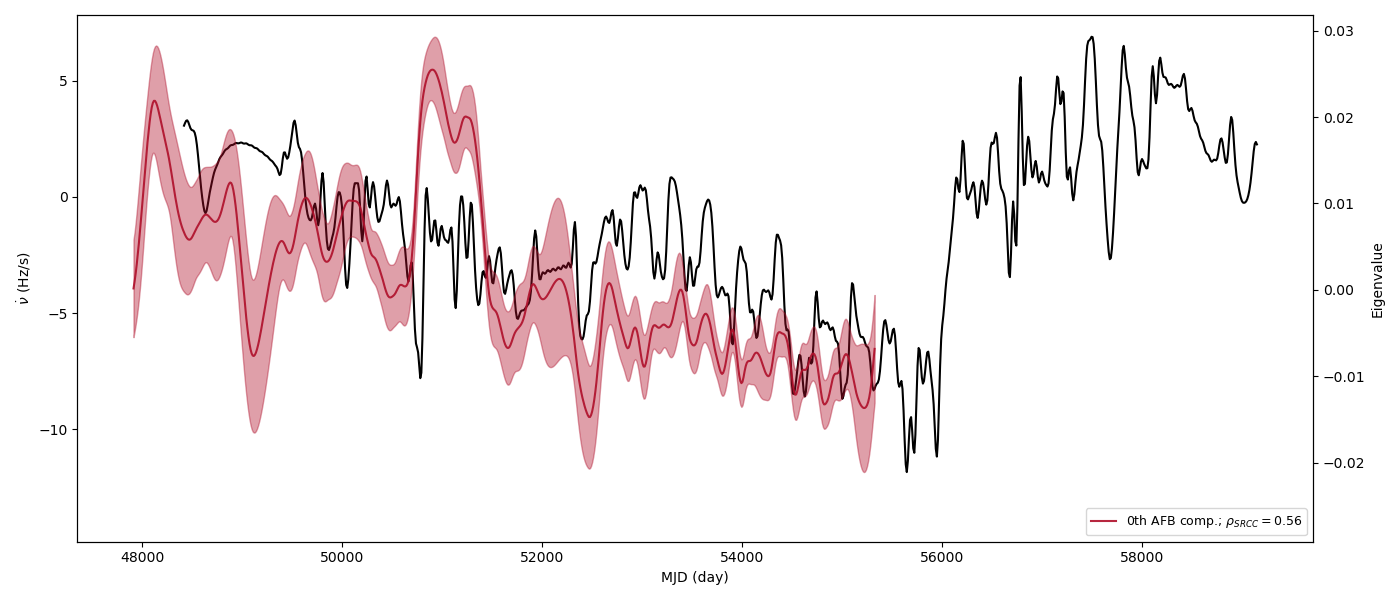

Correlations found for B1822-09_dfb_1400


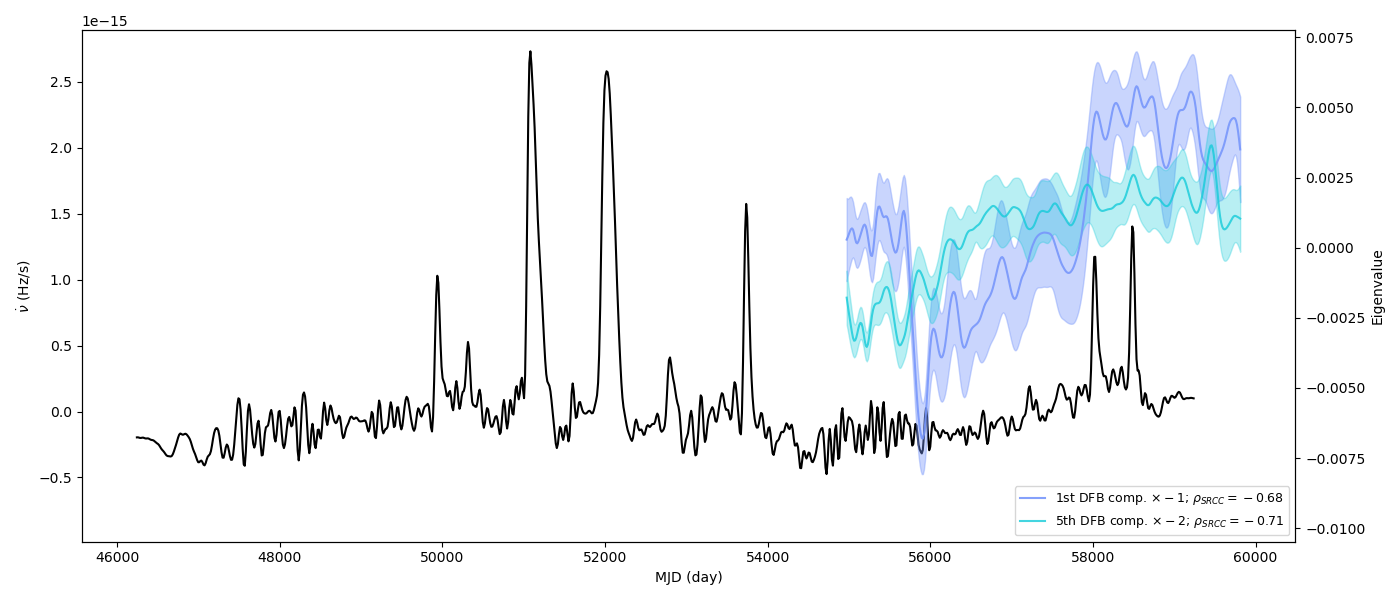

Correlations found for B1826-17_afb_1400


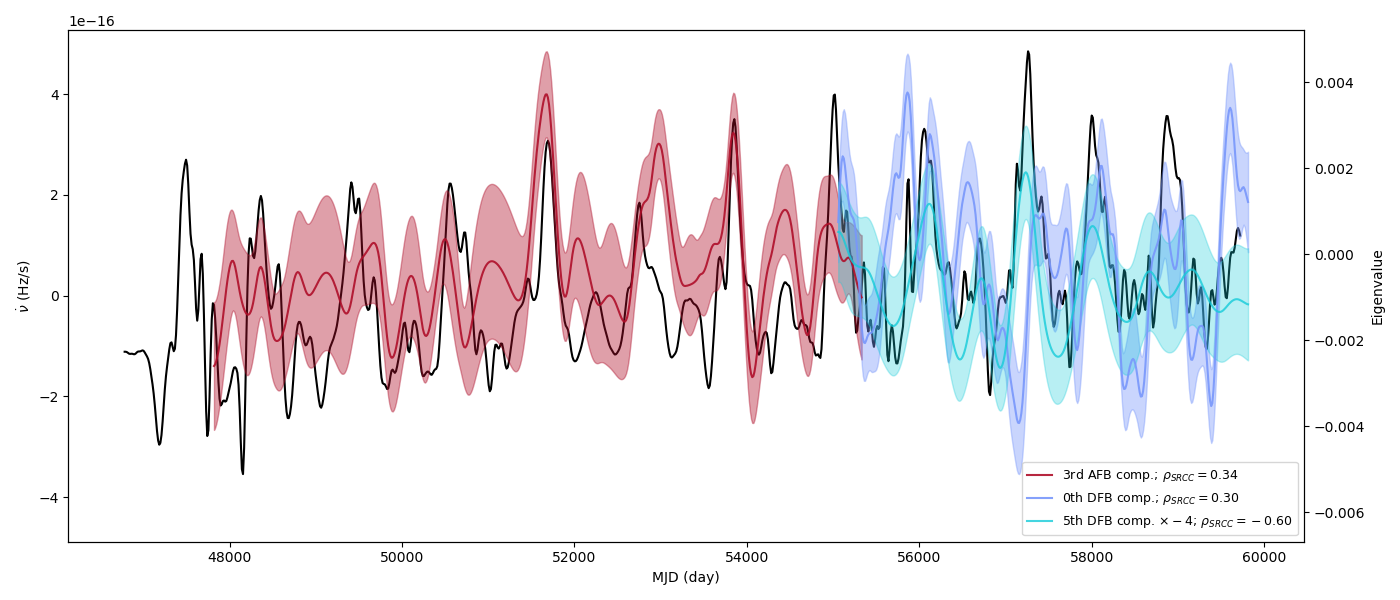

Correlations found for B1826-17_dfb_1400
Correlations found for B1828-11_afb_1400


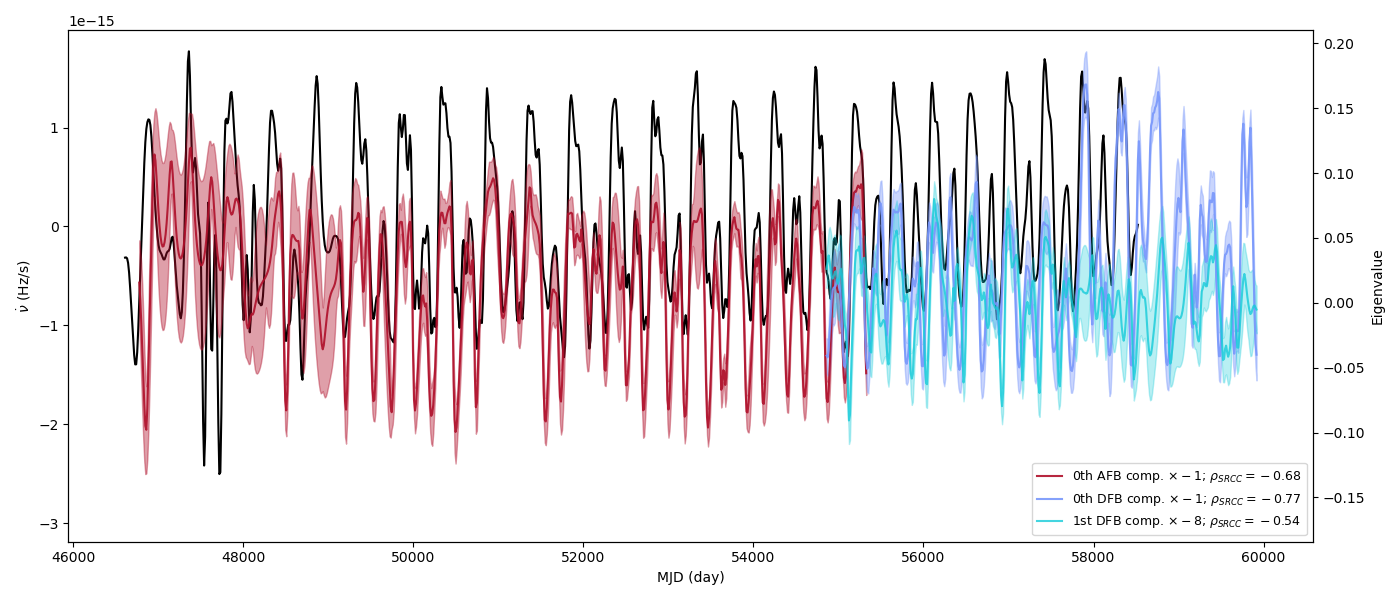

Correlations found for B1828-11_dfb_1400
Correlations found for B2035+36_afb_1400


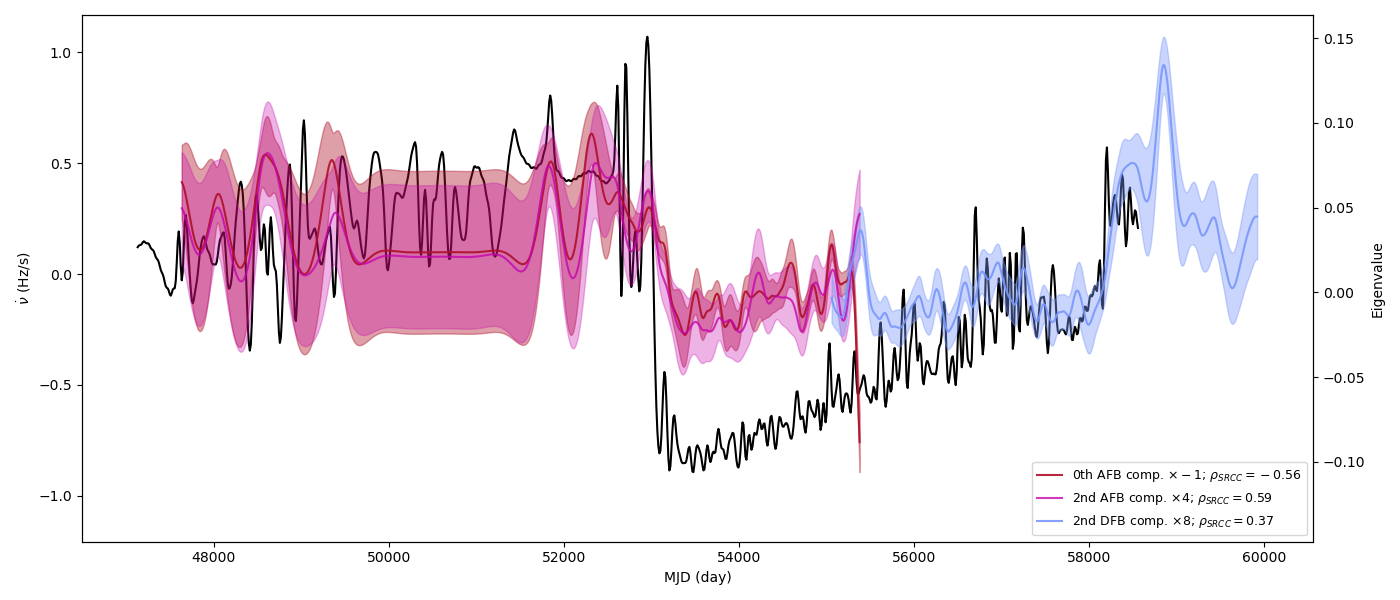

Correlations found for B2035+36_dfb_1400
Correlations found for J0538+2817_dfb_1400


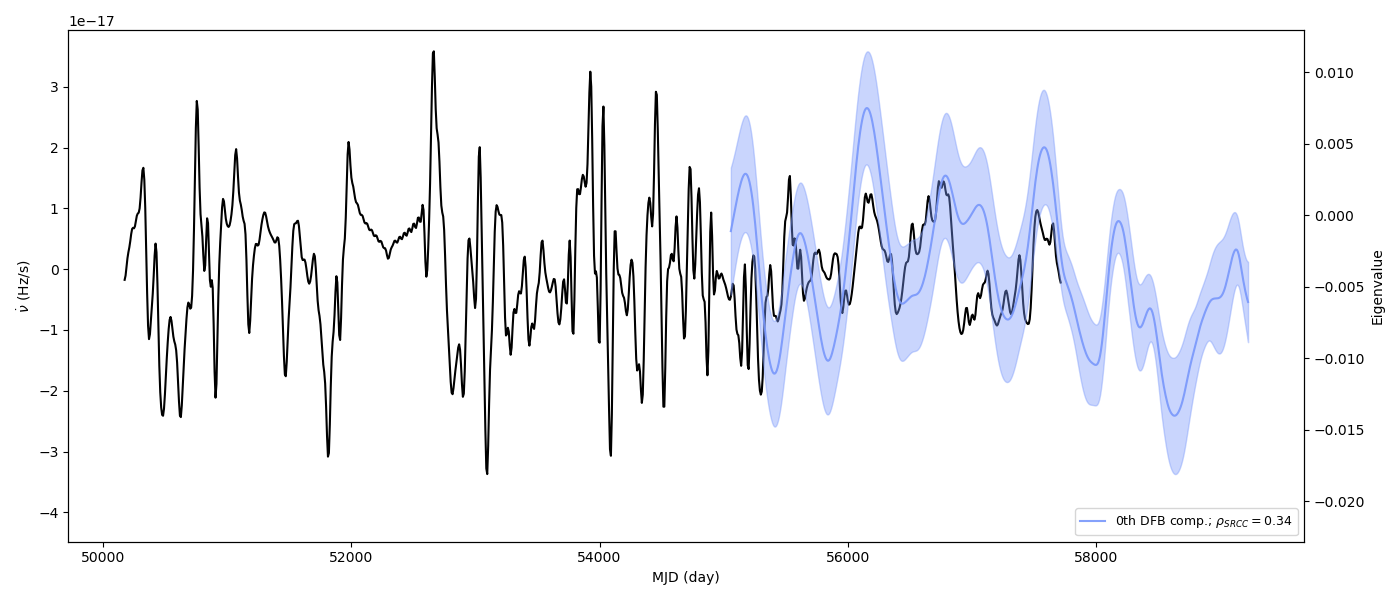

Correlations found for J2043+2740_afb_1400


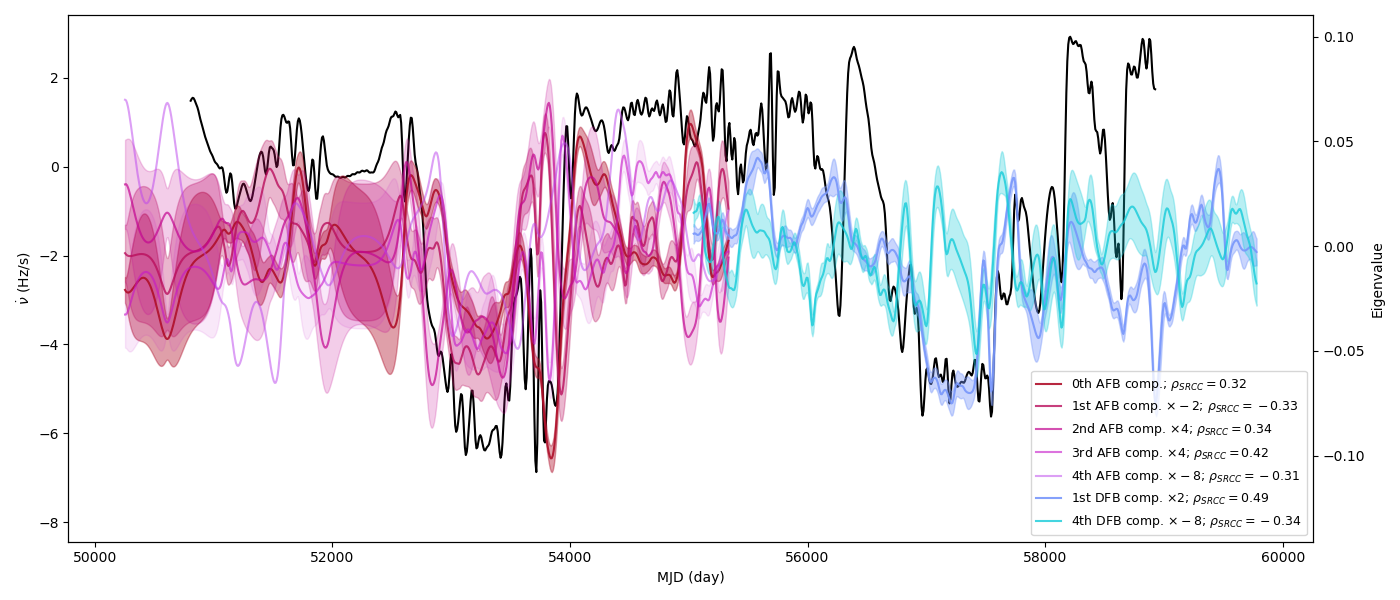

Correlations found for J2043+2740_dfb_1400


In [6]:
corrs_found = []
for psr, freq, be in zip(psr_list, freq_list, be_list):
    # this combo made it through the GP step and has correlation output to be checked
    desc = "{}_{}_{}".format(psr, be, freq)
    corr_file = os.path.join(data_dir, desc+"_corrs.txt")
    eignum, corrval, sigval = np.loadtxt(corr_file, unpack=True)
    
    if np.any(np.logical_and(np.abs(corrval) > 0.3, sigval > 1)):
        print("Correlations found for "+desc)
        sh_desc = "{}_{}".format(psr, freq)
        if sh_desc not in corrs_found:
            corrs_found.append(sh_desc)
            if os.path.exists(os.path.join(plots_dir, sh_desc+"_combined_corr.png")):
                display(Image(filename=os.path.join(plots_dir, sh_desc+"_combined_corr.png")))
            else:
                print("Cannot find a combined plot to show for "+sh_desc)
